In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sys, math, os
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import svm
sys.path.append("..")
from sklearn.svm import SVC
from sklearn import metrics
import datetime as dt
%matplotlib inline
sns.set(style='ticks', palette='Set2')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Merge the dataframe

In [0]:
import pandas as pd
links = ['https://drive.google.com/open?id=1xbrdf8HSpRxwMxer7E3KrVZLAiBd0iFX','https://drive.google.com/open?id=1SQKc-Rmnhy9Fjl7TJQfRfvhXeR_S7Dgz','https://drive.google.com/open?id=1Vn_ClTK-a_qI8TcL_I_S0Q8ActIVY9p_','https://drive.google.com/open?id=12j1vGHmwAv_JmVjKjhVNfbk3teVqpkFy','https://drive.google.com/open?id=1RUqLFcvUYqqNWhRDdExmn-2mRy9DUX0u','https://drive.google.com/open?id=101pMEtzouYBOq6k80527JNM2A9dhlXQu','https://drive.google.com/open?id=1Asl-xwqIX7e5ARWCnQeI4fMDGHgpI7g1','https://drive.google.com/open?id=106ag3ruckNmPMVJO2eYva6Qar2T7E2Ve','https://drive.google.com/open?id=126nWddO6Hr3O2yF1WgEPz3KO4L8A0wJi','https://drive.google.com/open?id=1UqWnyZtBHgu7Hmo6rP1HjK0x0aY96vLo','https://drive.google.com/open?id=1ogu2Hb8ErOY5_SFwEkWOD8pvMymCgv7Q','https://drive.google.com/open?id=1z0OJIDkzwuZZpeHiPD4qLnkN7Y-BmCea']
links_2 = ['https://drive.google.com/open?id=1xbrdf8HSpRxwMxer7E3KrVZLAiBd0iFX','https://drive.google.com/open?id=1SQKc-Rmnhy9Fjl7TJQfRfvhXeR_S7Dgz','https://drive.google.com/open?id=1Vn_ClTK-a_qI8TcL_I_S0Q8ActIVY9p_','https://drive.google.com/open?id=12j1vGHmwAv_JmVjKjhVNfbk3teVqpkFy','https://drive.google.com/open?id=1RUqLFcvUYqqNWhRDdExmn-2mRy9DUX0u','https://drive.google.com/open?id=101pMEtzouYBOq6k80527JNM2A9dhlXQu','https://drive.google.com/open?id=1Asl-xwqIX7e5ARWCnQeI4fMDGHgpI7g1','https://drive.google.com/open?id=106ag3ruckNmPMVJO2eYva6Qar2T7E2Ve','https://drive.google.com/open?id=126nWddO6Hr3O2yF1WgEPz3KO4L8A0wJi','https://drive.google.com/open?id=1UqWnyZtBHgu7Hmo6rP1HjK0x0aY96vLo','https://drive.google.com/open?id=1ogu2Hb8ErOY5_SFwEkWOD8pvMymCgv7Q','https://drive.google.com/open?id=1z0OJIDkzwuZZpeHiPD4qLnkN7Y-BmCea','https://drive.google.com/open?id=1j8vN0lZrOr2k2iLnh8WJFFHtK1blw7Qw','https://drive.google.com/open?id=1Bn9o_s3RtxQXvxWrjfVcXgnrTD0nvUwG','https://drive.google.com/open?id=131GELjjgUQgpqQOdu5V_Xh7qzsK_g1kE','https://drive.google.com/open?id=1qJ12hkjsFjlGrw3w-GT0VIfep_L6EXhP','https://drive.google.com/open?id=1RrjbUIyiq8AnQkJfEvKzci80aJM4_6Sn','https://drive.google.com/open?id=1dzDtF5Inj_gB-XravmjFIoco7V4qmMg2','https://drive.google.com/open?id=10jQvLp9NbAqvwKZdP-JeGiLK35VSEgGM','https://drive.google.com/open?id=1J9y6aCraYh9nwnHa_F-GT3JQFCKieLKP','https://drive.google.com/open?id=1TRyXyvKb8Oli_7Yk5txhnNu4Neh2ivmb','https://drive.google.com/open?id=1YNGvB-V-fZ1ZuF0-5LJSEyIGpzLHZko9','https://drive.google.com/open?id=1pPTNP75P7Z11gPP7NfVjLKhsX1k94cHD']
df = None
station_name = 'Pershing Square North'.lower()

# TRY :
# Pershing Square North , Broadway & E 14 St ,  University Pl & E 14 St
# Grand Army Plaza & Central Park S , Fulton St & Broadway

for i in links_2:
  fluff, id = i.split('=')
  downloaded = drive.CreateFile({'id': id})
  downloaded.GetContentFile('citi_bike_data.csv')

  if df is None:
    df = pd.read_csv('citi_bike_data.csv')
    df = df[ (df['start station name'].str.lower() == station_name)] #| (df['end station name'] == 'Pershing Square North')] 
    print(i, "-", df.shape)
  else:
    new = pd.read_csv('citi_bike_data.csv')
    new = new[ (new['start station name'].str.lower() == station_name)] #| (new['end station name'] == 'Pershing Square North')]
    df = pd.concat([df, new])
    print(i, "-", new.shape, df.shape)
print(df.shape)

https://drive.google.com/open?id=1xbrdf8HSpRxwMxer7E3KrVZLAiBd0iFX - (8874, 15)
https://drive.google.com/open?id=1SQKc-Rmnhy9Fjl7TJQfRfvhXeR_S7Dgz - (8084, 15) (16958, 15)
https://drive.google.com/open?id=1Vn_ClTK-a_qI8TcL_I_S0Q8ActIVY9p_ - (10889, 15) (27847, 15)
https://drive.google.com/open?id=12j1vGHmwAv_JmVjKjhVNfbk3teVqpkFy - (13625, 15) (41472, 15)
https://drive.google.com/open?id=1RUqLFcvUYqqNWhRDdExmn-2mRy9DUX0u - (14720, 15) (56192, 15)
https://drive.google.com/open?id=101pMEtzouYBOq6k80527JNM2A9dhlXQu - (14778, 15) (70970, 15)
https://drive.google.com/open?id=1Asl-xwqIX7e5ARWCnQeI4fMDGHgpI7g1 - (16348, 15) (87318, 15)
https://drive.google.com/open?id=106ag3ruckNmPMVJO2eYva6Qar2T7E2Ve - (16564, 15) (103882, 15)
https://drive.google.com/open?id=126nWddO6Hr3O2yF1WgEPz3KO4L8A0wJi - (16969, 15) (120851, 15)
https://drive.google.com/open?id=1UqWnyZtBHgu7Hmo6rP1HjK0x0aY96vLo - (16426, 15) (137277, 15)
https://drive.google.com/open?id=1ogu2Hb8ErOY5_SFwEkWOD8pvMymCgv7Q - (11736, 15) 

In [0]:
print(df.shape)

(304902, 15)


In [0]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,3.049020e+05,304902.0,3.049020e+05,304902.000000,304902.000000,304902.000000,304902.000000,304902.000000,304902.000000,304902.000000
mean,8.325460e+02,519.0,4.075187e+01,-73.977706,1116.331024,40.745563,-73.986206,28324.983257,1977.379771,1.078999
std,6.039932e+03,0.0,2.299979e-07,0.000001,1239.493937,0.016497,0.012560,6962.871438,11.926010,0.408503
min,6.100000e+01,519.0,4.075187e+01,-73.977706,72.000000,40.661063,-74.032108,14529.000000,1886.000000,0.000000
25%,4.300000e+02,519.0,4.075187e+01,-73.977706,441.000000,40.738274,-73.993012,21769.000000,1969.000000,1.000000
50%,6.170000e+02,519.0,4.075187e+01,-73.977706,492.000000,40.745712,-73.987882,29953.000000,1978.000000,1.000000
75%,9.770000e+02,519.0,4.075187e+01,-73.977706,546.000000,40.754666,-73.980144,33102.000000,1988.000000,1.000000
max,2.946638e+06,519.0,4.075200e+01,-73.977000,3908.000000,40.818299,-73.907744,42046.000000,2003.000000,2.000000


# Cleaning the dataframe

In [0]:
#sort df
df.sort_values("tripduration", axis = 0, ascending = True, inplace = True, na_position ='last')

#number of trips under 90 seconds
trip = df.apply(lambda x: True if x['tripduration'] < 91 else False , axis=1)
numOfRows = len(trip[trip == True].index)
percent_del = numOfRows / len(df)
print('Number of Rows in dataframe less than 90 seconds : ', numOfRows)
print('Percentage of rows that will be deleted: ', percent_del)

Number of Rows in dataframe less than 90 seconds :  465
Percentage of rows that will be deleted:  0.0015250801897002972


In [0]:
#drop trips that are less than 90 seconds and where start and end stations are the same
df_clean = df.drop(df[(df['tripduration'] < 91)].index)

In [0]:
#number of trips where start and end station are the same
df_dup = df_clean[df_clean['start station id'] == df_clean['end station id']]
print (len(df_dup)/404947) #4%

#look at it against the number of minutes
df_clean = df.drop(df_clean[(df_clean['start station id'] == df_clean['end station id'])].index)

df_clean.info()

0.003600471172770758
<class 'pandas.core.frame.DataFrame'>
Int64Index: 303261 entries, 2188750 to 42479
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             303261 non-null  int64  
 1   starttime                303261 non-null  object 
 2   stoptime                 303261 non-null  object 
 3   start station id         303261 non-null  float64
 4   start station name       303261 non-null  object 
 5   start station latitude   303261 non-null  float64
 6   start station longitude  303261 non-null  float64
 7   end station id           303261 non-null  float64
 8   end station name         303261 non-null  object 
 9   end station latitude     303261 non-null  float64
 10  end station longitude    303261 non-null  float64
 11  bikeid                   303261 non-null  int64  
 12  usertype                 303261 non-null  object 
 13  birth year               303261 n

In [0]:
df= df_clean
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
2188750,61,2019-08-29 19:18:14.2420,2019-08-29 19:19:16.2260,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,32971,Subscriber,1989,1
629357,61,2019-10-10 06:21:10.2630,2019-10-10 06:22:11.8860,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,17030,Subscriber,1986,1
172601,61,2019-06-03 13:02:26.6020,2019-06-03 13:03:28.4250,519.0,Pershing Square North,40.751873,-73.977706,517.0,Pershing Square South,40.751581,-73.977910,32214,Subscriber,1967,1
179441,61,2019-12-06 09:57:10.4660,2019-12-06 09:58:12.0210,519.0,Pershing Square North,40.751873,-73.977706,517.0,Pershing Square South,40.751581,-73.977910,38886,Subscriber,1962,1
985124,61,2018-05-30 12:49:00.3750,2018-05-30 12:50:01.6080,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,32400,Subscriber,1963,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972609,343655,2018-05-04 18:17:36.4310,2018-05-08 17:45:11.4450,519.0,Pershing Square North,40.751873,-73.977706,3618.0,27 St & Hunter St,40.748500,-73.941275,30370,Subscriber,1973,1
925875,584342,2019-06-13 17:04:30.8340,2019-06-20 11:23:33.3080,519.0,Pershing Square North,40.751873,-73.977706,3596.0,Sullivan Pl & Bedford Ave,40.664241,-73.957469,19586,Customer,1969,0
1077638,756634,2018-10-17 16:35:46.4830,2018-10-26 10:46:20.9020,519.0,Pershing Square North,40.751873,-73.977706,3432.0,NYCBS Depot - GOW,40.669060,-73.994637,19155,Customer,1969,0
42524,909120,2019-10-01 15:22:42.0370,2019-10-12 03:54:42.8370,519.0,Pershing Square North,40.751873,-73.977706,427.0,Bus Slip & State St,40.701907,-74.013942,34019,Customer,1969,0


# Data Preparation - Creating Columns 

In [0]:
df['date'] = df['starttime'].apply(lambda x:x.split(' ')[0]) #Create 'date' column

In [0]:
df["hour"] = df['starttime'].apply(lambda x: x.split()[1].split(":")[0]) # Create 'hour' Column

In [0]:
df['day'] = df['date'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d')).dt.weekday # Create 'day' column: the value of da is from 0 to 6: Mon - Sun

In [0]:
df['month'] = df['date'].apply(lambda x:pd.to_datetime(x,format='%Y-%m-%d')).dt.month # Create 'month' column

In [0]:
df['date'] = pd.to_datetime(df['date'],format = '%Y-%m-%d') # Change the format to datetime
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime']= pd.to_datetime(df['stoptime'])

In [0]:
Isweekend = []
for i in df['date']:
  num=i.weekday()
  if num < 5:
    k = 0
  else:
    k = 1   
  Isweekend.append(k)    
df['Isweekend'] = Isweekend # Create one column of Isweekend: 0-Weekday; 1-Weekend

In [0]:
from datetime import date 
import holidays 
  
# Select country - USA and years = 2019
us_holidays = holidays.UnitedStates(years =2019) 
  

IsHoliday = []
for i in df['date']:
  if i in us_holidays:
    IsHoliday.append(1)
  else:
    IsHoliday.append(0)  

df['IsHoliday'] = IsHoliday #Create one column of Isholiday: 0 - holiday; 1-Not holiday

In [0]:
IsWorkingday = []
for i in range(len(df['Isweekend'])):
    if (df['Isweekend'].iloc[i] == 1) or (df['IsHoliday'].iloc[i] == 1): # Not working Day
      IsWorkingday.append('FALSE')
    else:
      IsWorkingday.append('TRUE')
print(IsWorkingday)



['TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', '

In [0]:
df['IsWorkingday'] = IsWorkingday

In [0]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,day,month,Isweekend,IsHoliday,IsWorkingday
2188750,61,2019-08-29 19:18:14.242,2019-08-29 19:19:16.226,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,32971,Subscriber,1989,1,2019-08-29,19,3,8,0,0,TRUE
629357,61,2019-10-10 06:21:10.263,2019-10-10 06:22:11.886,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,17030,Subscriber,1986,1,2019-10-10,06,3,10,0,0,TRUE
172601,61,2019-06-03 13:02:26.602,2019-06-03 13:03:28.425,519.0,Pershing Square North,40.751873,-73.977706,517.0,Pershing Square South,40.751581,-73.977910,32214,Subscriber,1967,1,2019-06-03,13,0,6,0,0,TRUE
179441,61,2019-12-06 09:57:10.466,2019-12-06 09:58:12.021,519.0,Pershing Square North,40.751873,-73.977706,517.0,Pershing Square South,40.751581,-73.977910,38886,Subscriber,1962,1,2019-12-06,09,4,12,0,0,TRUE
985124,61,2018-05-30 12:49:00.375,2018-05-30 12:50:01.608,519.0,Pershing Square North,40.751873,-73.977706,519.0,Pershing Square North,40.751873,-73.977706,32400,Subscriber,1963,2,2018-05-30,12,2,5,0,0,TRUE


# Weather and Precipitations Usage Analysis

In [0]:
weather_link = 'https://drive.google.com/open?id=1AE5SUD0DY3duqS-x3mtIyyznm3eDVh9-'
df_weather = None
fluff, id = weather_link.split('=')
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('weather.csv')
df_weather = pd.read_csv('weather.csv')

# convert the 'Date' column to datetime format 
df_weather['DATE']= pd.to_datetime(df_weather['DATE']) 
# add calculated column with the average temp = (TMAX + TMIN)/2
df_weather['COLD'] = (df_weather['TMAX'] + df_weather['TMIN'])/2

# leave only important columns out of 'NAME','DATE', 'TEMP', 'PRCP', 'SNOW', 'PREC', 'COLD', 'WIND'
df_weather = df_weather.loc[:, df_weather.columns.intersection(['NAME','DATE', 'PRCP', 'COLD'])]
df_weather = df_weather.rename(columns={"PRCP": "PREC"})


Isweekend = []
for i in df_weather['DATE']:
  num=i.weekday()
  if num < 5:
    k = 0
  else:
    k = 1   
  Isweekend.append(k)    
df_weather['Isweekend'] = Isweekend # Create one column of Isweekend: 0-Weekday; 1-Weekend  

IsHoliday = []
for i in df_weather['DATE']:
  if i in us_holidays:
    IsHoliday.append(1)
  else:
    IsHoliday.append(0)  

df_weather['IsHoliday'] = IsHoliday #Create one column of Isholiday: 0 - holiday; 1-Not holiday

IsWorkingday = []
for i in range(len(df_weather['Isweekend'])):
    if (df_weather['Isweekend'].iloc[i] == 1) or (df_weather['IsHoliday'].iloc[i] == 1): # Not working Day
      IsWorkingday.append('0')
    else:
      IsWorkingday.append('1')

df_weather['IsWorkingday'] = IsWorkingday
df_weather.drop(['IsHoliday','Isweekend'], axis = 1, inplace = True)
df_weather['IsWorkingday'] = df_weather['IsWorkingday'].astype(int)
df_weather

,NAME,DATE,PREC,COLD,IsWorkingday
0,"NY CITY CENTRAL PARK, NY US",2019-01-01,0.06,48.5,0
1,"NY CITY CENTRAL PARK, NY US",2019-01-02,0.00,37.5,1
2,"NY CITY CENTRAL PARK, NY US",2019-01-03,0.00,40.5,1
3,"NY CITY CENTRAL PARK, NY US",2019-01-04,0.00,41.0,1
4,"NY CITY CENTRAL PARK, NY US",2019-01-05,0.50,44.0,0
...,...,...,...,...,...
360,"NY CITY CENTRAL PARK, NY US",2019-12-27,0.00,50.0,1
361,"NY CITY CENTRAL PARK, NY US",2019-12-28,0.00,47.0,0
362,"NY CITY CENTRAL PARK, NY US",2019-12-29,0.25,41.5,0
363,"NY CITY CENTRAL PARK, NY US",2019-12-30,0.74,39.0,1


In [0]:
df_merged = pd.merge(df[['date','start station name','end station name','IsWorkingday','hour']], df_weather[['DATE','COLD','PREC']],how='left',left_on='date', right_on='DATE')
df_merged = df_merged.drop(columns='DATE')
df_merged

,date,start station name,end station name,IsWorkingday,hour,COLD,PREC
0,2019-08-29,Pershing Square North,Pershing Square North,TRUE,19,73.0,0.0
1,2019-10-10,Pershing Square North,Pershing Square North,TRUE,06,62.0,0.0
2,2019-06-03,Pershing Square North,Pershing Square South,TRUE,13,64.0,0.0
3,2019-12-06,Pershing Square North,Pershing Square South,TRUE,09,42.0,0.0
4,2018-05-30,Pershing Square North,Pershing Square North,TRUE,12,NaN,NaN
...,...,...,...,...,...,...,...
303256,2018-05-04,Pershing Square North,27 St & Hunter St,TRUE,18,NaN,NaN
303257,2019-06-13,Pershing Square North,Sullivan Pl & Bedford Ave,TRUE,17,60.0,0.6
303258,2018-10-17,Pershing Square North,NYCBS Depot - GOW,TRUE,16,NaN,NaN
303259,2019-10-01,Pershing Square North,Bus Slip & State St,TRUE,15,72.0,0.0


In [0]:
df_outflow = df_merged[df_merged['start station name'].str.lower() == station_name]
df_outflow['hour'] = df_outflow['hour'].astype(int)
df_outflow = df_outflow[['date','hour','IsWorkingday','COLD','PREC']].sort_values(by = ['date','hour']).groupby(['date', 'hour','IsWorkingday','COLD','PREC']).size().reset_index(name='outflow')
df_outflow 

,date,hour,IsWorkingday,COLD,PREC,outflow
0,2019-01-01,0,FALSE,48.5,0.06,2
1,2019-01-01,3,FALSE,48.5,0.06,1
2,2019-01-01,6,FALSE,48.5,0.06,1
3,2019-01-01,7,FALSE,48.5,0.06,1
4,2019-01-01,8,FALSE,48.5,0.06,1
...,...,...,...,...,...,...
7510,2019-12-31,18,TRUE,40.5,0.02,4
7511,2019-12-31,19,TRUE,40.5,0.02,4
7512,2019-12-31,20,TRUE,40.5,0.02,1
7513,2019-12-31,22,TRUE,40.5,0.02,1


In [0]:
'''df_inflow = df_merged[df_merged['start station name'].str.lower() == station_name]
df_inflow['hour'] = df_inflow['hour'].astype(int)
df_inflow = df_inflow[['date','hour','IsWorkingday','COLD','PREC']].sort_values(by = ['date','hour']).groupby(['date', 'hour','IsWorkingday','COLD','PREC']).size().reset_index(name='inflow')
df_inflow'''

"df_inflow = df_merged[df_merged['start station name'].str.lower() == station_name]\ndf_inflow['hour'] = df_inflow['hour'].astype(int)\ndf_inflow = df_inflow[['date','hour','IsWorkingday','COLD','PREC']].sort_values(by = ['date','hour']).groupby(['date', 'hour','IsWorkingday','COLD','PREC']).size().reset_index(name='inflow')\ndf_inflow"

In [0]:
df_temp_outflow = pd.merge(df[['date','start station name','end station name','IsWorkingday']], df_weather[['DATE','COLD','PREC']],how='left',left_on='date', right_on='DATE')
df_temp_outflow = df_temp_outflow[['date','IsWorkingday','COLD','PREC']].sort_values(by = ['date']).groupby(['date', 'IsWorkingday','COLD','PREC']).size().reset_index(name ='outflow')
df_temp_outflow.drop('outflow', axis = 1, inplace = True)
print(df_temp_outflow) #with the date and three feature columns

          date IsWorkingday  COLD  PREC
0   2019-01-01        FALSE  48.5  0.06
1   2019-01-02         TRUE  37.5  0.00
2   2019-01-03         TRUE  40.5  0.00
3   2019-01-04         TRUE  41.0  0.00
4   2019-01-05        FALSE  44.0  0.50
..         ...          ...   ...   ...
360 2019-12-27         TRUE  50.0  0.00
361 2019-12-28        FALSE  47.0  0.00
362 2019-12-29        FALSE  41.5  0.25
363 2019-12-30         TRUE  39.0  0.74
364 2019-12-31         TRUE  40.5  0.02

[365 rows x 4 columns]


In [0]:
rng = pd.date_range('2018-01-01', periods=730*24, freq='H')
df_final = pd.DataFrame({ 'Date': rng }) 
df_final['date'] = [d.date() for d in df_final['Date']]
df_final['hour'] = pd.to_datetime(df_final['Date'], format='%H:%M:%S').dt.hour
df_final = df_final.drop(columns=['Date'])
df_final['date'] = df_final['date'].astype('datetime64[ns]')
df_final['hour'] = df_final['hour'].astype(int)

df_final = pd.merge(df_final, df_outflow, how='left', left_on=['date','hour'], right_on=['date','hour'])

df_final.drop('IsWorkingday', axis = 1,inplace = True)
df_final.drop('COLD', axis = 1,inplace = True)
df_final.drop('PREC', axis = 1,inplace = True)
df_final.fillna(0, inplace=True)

df_final = pd.merge(df_final, df_weather[['DATE','COLD','PREC','IsWorkingday']],how='left',left_on='date', right_on='DATE')
df_final.drop('DATE', axis = 1,inplace = True)

#df_final = pd.merge(df_final, df_temp_outflow, how='left')
#print(df_final)

#df_final = pd.merge(df_final, df_inflow[['date','hour','inflow']], how='left', left_on=['date','hour'], right_on=['date','hour'])

#For exhaustive data
df_final = pd.get_dummies(df_final, drop_first = True)

#For data which doesn't have any NaN values
#df_final = df_final.drop(df_final.index[(df_final['outflow'].isnull())])
#df_final = pd.get_dummies(df_final, drop_first = True)

# df_final['month'] = df_final['date'].apply(lambda x:pd.to_datetime(x,format='%Y-%m-%d')).dt.month # Create 'month' column

df_model = df_final
df_model

,date,hour,outflow,COLD,PREC,IsWorkingday
0,2018-01-01,0,0.0,NaN,NaN,NaN
1,2018-01-01,1,0.0,NaN,NaN,NaN
2,2018-01-01,2,0.0,NaN,NaN,NaN
3,2018-01-01,3,0.0,NaN,NaN,NaN
4,2018-01-01,4,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
17515,2019-12-31,19,4.0,40.5,0.02,1.0
17516,2019-12-31,20,1.0,40.5,0.02,1.0
17517,2019-12-31,21,0.0,40.5,0.02,1.0
17518,2019-12-31,22,1.0,40.5,0.02,1.0


In [0]:
df_model['month'] = df_model['date'].apply(lambda x:pd.to_datetime(x,format='%Y-%m-%d')).dt.month # Create 'month' column
#df_model.drop('month', axis = 1, inplace = True)

In [0]:
df_model

,date,hour,outflow,COLD,PREC,IsWorkingday,month
0,2019-01-01,0,2.0,48.5,0.06,0,1
1,2019-01-01,1,0.0,48.5,0.06,0,1
2,2019-01-01,2,0.0,48.5,0.06,0,1
3,2019-01-01,3,1.0,48.5,0.06,0,1
4,2019-01-01,4,0.0,48.5,0.06,0,1
...,...,...,...,...,...,...,...
8755,2019-12-31,19,4.0,40.5,0.02,1,12
8756,2019-12-31,20,1.0,40.5,0.02,1,12
8757,2019-12-31,21,0.0,40.5,0.02,1,12
8758,2019-12-31,22,1.0,40.5,0.02,1,12


In [0]:
listbins = [0,5,12,1000000]
outflow_label = ['0-5','6-12','More than 12']
#outflow_label = ['0','1','2','3','4']  #Group 0:0-3 bikes, Group 1: 4-6 bikes...
grouped_outflow = pd.cut(df_model['outflow'],bins=listbins,labels=outflow_label,include_lowest=True)

In [0]:
print(grouped_outflow)

0       0-5
1       0-5
2       0-5
3       0-5
4       0-5
       ... 
8755    0-5
8756    0-5
8757    0-5
8758    0-5
8759    0-5
Name: outflow, Length: 8760, dtype: category
Categories (3, object): [0-5 < 6-12 < More than 12]


In [0]:
df_model['grouped_outflow'] = grouped_outflow

In [0]:
df_model

,date,hour,outflow,COLD,PREC,IsWorkingday,month,grouped_outflow
0,2019-01-01,0,2.0,48.5,0.06,0,1,0-5
1,2019-01-01,1,0.0,48.5,0.06,0,1,0-5
2,2019-01-01,2,0.0,48.5,0.06,0,1,0-5
3,2019-01-01,3,1.0,48.5,0.06,0,1,0-5
4,2019-01-01,4,0.0,48.5,0.06,0,1,0-5
...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,4.0,40.5,0.02,1,12,0-5
8756,2019-12-31,20,1.0,40.5,0.02,1,12,0-5
8757,2019-12-31,21,0.0,40.5,0.02,1,12,0-5
8758,2019-12-31,22,1.0,40.5,0.02,1,12,0-5


In [0]:
#df_final['date'] = df_final['date'].map(dt.datetime.toordinal)
#print(df_final)
np.random.seed(42)
features = ['hour','IsWorkingday','COLD','PREC','month']
X = df_model[features]
Y = df_model['grouped_outflow']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [0]:
df_model['grouped_outflow'].groupby(grouped_outflow).count()

outflow
0-5             3573
6-12            1585
More than 12    3602
Name: grouped_outflow, dtype: int64

**1. Logistic Regression**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Accuracy on testing = 0.6318


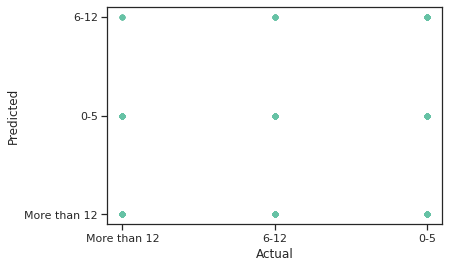

In [0]:
regressor = LogisticRegression(max_iter=5000)  
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

print ("Accuracy on testing = %.4f" % accuracy_score(regressor.predict(X_test), Y_test) )

df_new = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df_new.plot(kind="scatter", x='Actual', y='Predicted')

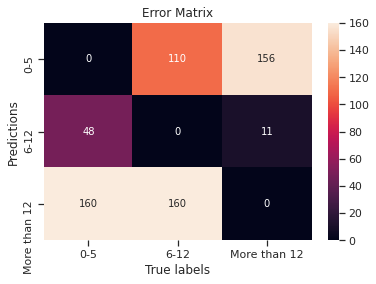

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(regressor.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

**2. Decision Tree Classifier**

In [0]:
def entropy(target_column):
    """
        computes -sum_i p_i * log_2 (p_i) for each i
    """
    # get the counts of each target value
    target_counts = target_column.value_counts().astype(float).values
    total = target_column.count()  
    # compute probas
    probas = target_counts/total
    # p_i * log_2 (p_i)
    entropy_components = probas * np.log2(probas)
    # return negative sum
    return - entropy_components.sum()

def information_gain(df, info_column, target_column, threshold):
    """
        computes H(target) - 
          (fraction_above_thresh * H(target | info > thresh) + fraction_below_thresho * H(target | info <= thresh))
    """
    # split data
    data_above_thresh = df[df[info_column] > threshold]
    data_below_thresh = df[df[info_column] <= threshold]
    # get entropy
    H = entropy(df[target_column])
    entropy_above = entropy(data_above_thresh[target_column])
    entropy_below = entropy(data_below_thresh[target_column])
    # compute weighted average
    ct_above = data_above_thresh.shape[0]
    ct_below = data_below_thresh.shape[0]
    tot = float(df.shape[0])
    return H - entropy_above*ct_above/tot - entropy_below*ct_below/tot

In [0]:
from sklearn import tree
from sklearn.metrics import accuracy_score
for i in range(1,30):
  clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=i)
  clf = clf.fit(X_train, Y_train)
  print("When i is " + str(i))
  print ("Accuracy on testing = %.4f" % accuracy_score(clf.predict(X_test), Y_test)) 

When i is 1
Accuracy on testing = 0.6638
When i is 2
Accuracy on testing = 0.7334
When i is 3
Accuracy on testing = 0.7454
When i is 4
Accuracy on testing = 0.7757
When i is 5
Accuracy on testing = 0.7814
When i is 6
Accuracy on testing = 0.7917
When i is 7
Accuracy on testing = 0.7939
When i is 8
Accuracy on testing = 0.8042
When i is 9
Accuracy on testing = 0.8037
When i is 10
Accuracy on testing = 0.7957
When i is 11
Accuracy on testing = 0.7928
When i is 12
Accuracy on testing = 0.7837
When i is 13
Accuracy on testing = 0.7797
When i is 14
Accuracy on testing = 0.7831
When i is 15
Accuracy on testing = 0.7711
When i is 16
Accuracy on testing = 0.7768
When i is 17
Accuracy on testing = 0.7666
When i is 18
Accuracy on testing = 0.7688
When i is 19
Accuracy on testing = 0.7648
When i is 20
Accuracy on testing = 0.7626
When i is 21
Accuracy on testing = 0.7626
When i is 22
Accuracy on testing = 0.7637
When i is 23
Accuracy on testing = 0.7586
When i is 24
Accuracy on testing = 0.7597
W

When the parameter of Max-depth is 9，we can get the biggest accuracy.

In [0]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=9)
clf = clf.fit(X_train, Y_train)
print ("Accuracy on testing = %.4f" % accuracy_score(clf.predict(X_test), Y_test)) 

Accuracy on testing = 0.8031


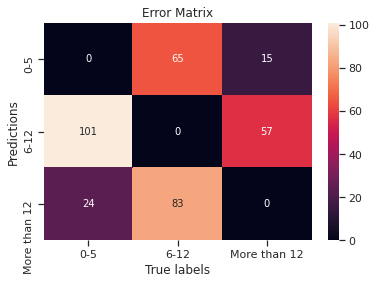

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(clf.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

**3. KNN**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,20):
  Knnmodel = KNeighborsClassifier(n_neighbors=i)
  Knnmodel.fit(X_train,Y_train)
  print("When i is " + str(i))
  print ("Accuracy on testing = %.4f" % accuracy_score(Knnmodel.predict(X_test), Y_test) )

When i is 1
Accuracy on testing = 0.7534
When i is 2
Accuracy on testing = 0.7471
When i is 3
Accuracy on testing = 0.7979
When i is 4
Accuracy on testing = 0.7900
When i is 5
Accuracy on testing = 0.7974
When i is 6
Accuracy on testing = 0.7894
When i is 7
Accuracy on testing = 0.7808
When i is 8
Accuracy on testing = 0.7820
When i is 9
Accuracy on testing = 0.7768
When i is 10
Accuracy on testing = 0.7711
When i is 11
Accuracy on testing = 0.7711
When i is 12
Accuracy on testing = 0.7711
When i is 13
Accuracy on testing = 0.7671
When i is 14
Accuracy on testing = 0.7683
When i is 15
Accuracy on testing = 0.7757
When i is 16
Accuracy on testing = 0.7677
When i is 17
Accuracy on testing = 0.7683
When i is 18
Accuracy on testing = 0.7643
When i is 19
Accuracy on testing = 0.7643


We choose n_neighbor = 3

In [0]:
from sklearn.neighbors import KNeighborsClassifier
Knnmodel = KNeighborsClassifier(n_neighbors=3)
Knnmodel.fit(X_train,Y_train)
print ("Accuracy on testing = %.4f" % accuracy_score(Knnmodel.predict(X_test), Y_test) )

Accuracy on testing = 0.7979


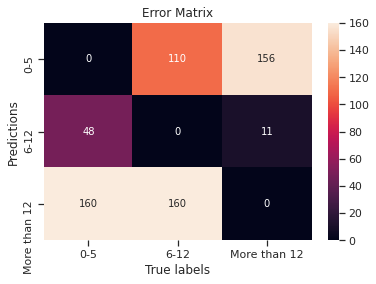

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

tick_labels = ['0-5','6-12','More than 12']

def plot_matrix(mat, title, remove_diagonal=True):
    error_mat = mat.copy()
    if remove_diagonal:
        diag_ixs = np.arange(mat.shape[0])
        error_mat[diag_ixs, diag_ixs] = 0
    sns.heatmap(error_mat, annot=True, fmt='d', yticklabels=tick_labels, xticklabels=tick_labels)
    plt.ylabel('Predictions')
    plt.xlabel('True labels')
    plt.title(title)

random_predictions = np.random.choice(range(len(Y_test)), len(Y))
random_conf_mat = confusion_matrix(regressor.predict(X_test), Y_test)
plot_matrix(random_conf_mat, 'Error Matrix', remove_diagonal=True)

**4. Linear Model**

In [0]:
# from sklearn import linear_model 

# my_linear = linear_model.Lasso(alpha = 0.01)
# my_linear.fit(X, Y)
# pd.DataFrame([dict(zip(features, my_linear.coef_))])
# preds = my_linear.predict(X)
# predictions_df = df_model.assign(predictions=preds)
# predictions_df.plot(kind="scatter", x = 'grouped_outflow', y = 'predictions')
# predictions_df.head
